# Group Name: Last Minute F

- Member 1: s3680881 - Fahim Tahmeed
- Member 2: s3516805 - Richard Purwowilianto






# Predicting House Prices in Melbourne

## Introduction

The goal of this project is to predict the price of houses in Melbourne. This dataset was sourced from Kaggle.com at https://www.kaggle.com/anthonypino/melbourne-housing-market <cite data-cite="adult_uci">(Pino, 2018)</cite>. 

This report is organized as follows:
- [Overview](#Overview) - Describes dataset used and attributes used.
- [Data Preparation](#Data-Preparation) - Covers data cleaning and data preparation measures.
- [Data Exploration](#Data-Exploration) - Explores dataset features and their inter-relationships.
- [Statistical Modeling and Performance Evaluation](#Statistical-Modeling-and-Performance-Evaluation) - Section provides multiple linear regression models in full and performs diagostic runs to allow us to perform variable selections using the calculated p-values to obtain a recduced model
- [Summary and Conclusions](#Summary-and-Conclusions) - Summary of our work and presents our findings.

## Overview

### Data Source

Anthony Pino provided 2 dataset of house prices in Melbourne and we will be using the complete set `Melbourne_housing_FULL.csv`. The other dataset `MELBOURNE_HOUSE_PRICE_LESS.csv` does not contain some of the attributes that we were interested in such as `bedroom`, `bathroom`, `landsize`, etc. The dataset that we will be using have a total of 34,857 rows and 21 rows. There are however, quite a number of missing values which will need to be cleaned up before performing our experiments.

 

### Project Objective

Our objective with undertaking this particular project topic is to accurately predict the price of houses in Melbourne. This is because we as students will be looking into purchasing our first home soon after getting a job in the near future. Furthermore, we will get a much better understanding of the prices based on attributes listed below.




### Target Feature

Our target feature is `price`, which is a continuous numerical feature. Hence, our target is based on regression of house pricing in Victoria, which is dependant on many of the different features provided in our dataset.



### Descriptive Features

The feature descriptions below are from the `Melbourne_housing_FULL.csv` file: 

- **`suburb`**: Name of suburb. [discrete]
- **`address`**: Address of house, eg. 9/332 Pascoe Vale Rd. [discrete]
- **`rooms`**: Number of rooms. [numerical]
- **`type`**: h-house, u-unit, t-townhouse. [discrete]
- **`price`**: Price of house. [numerical]
- **`method`**: S-Property Sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available. [discrete]
- **`seller`**: Real Estate Agent [discrete]
- **`date`**: Date sold [discrete]
- **`distance`**: Distance from CBD in Kilometres. [numerical]
- **`postcode`**: Postcode of property. [numerical]
- **`bedroom`**: Number of bedroom(s). [numerical]
- **`bathroom`**: Number of bathroom(s). [numerical]
- **`carpark`**: Number of carpark(s). [numerical]
- **`council_area`**: Governing council e.g. Yarra City Council. [discrete]
- **`lattitude`**: Lattitude. [numerical]
- **`longtitude`**: Longtitude. [numerical]
- **`region_name`**: General Region e.g. Northern Metropolitan [discrete]
- **`property_count`**: Number of properties that exist in the suburb. [numerical]

`rooms` and `bedroom` are not specificed explicitly by the owner of the dataset. Pino mentioned that rooms and bedroom is sourced differently and could be the case that one considered a study meanwhile the other did not (https://www.kaggle.com/anthonypino/melbourne-housing-market/discussion/32987). For our experiment, feature selection will be used to remove attributes that we are not interested in. The final list of attributes used will be the following:

- type
- price
- date
- distance
- postcode
- bedroom
- bathroom
- landsize
- building_area
- year_built
- carpark
- council_area
- region_name
- property_count

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings

#url = 'https://raw.githubusercontent.com/Evzy/foranalytics/master/melbourne_house_prices.csv'
#houseDataSet = pd.read_csv(url)

warnings.filterwarnings('ignore')
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

## Data Preparation

_______
The first thing we do is enter the command to read the Excel spreadsheet file onto the database and select our target while also selecting the other features around that it may depend upon, hence what is happening below in the following code.
We also sum all the null values present in our dataset to check for the amount of missing values, theres a large number of missing values so we need to correct and clean the data before we use it.

In [2]:
houseDataSet = pd.read_csv('melbourne_house_prices.csv')
houseDataSet = houseDataSet.sort_values('suburb', ascending=True)

targetColumn = 'price'

attributes = ['type','price','date','distance',
                'postcode','bedroom','bathroom',
                'landsize', 'building_area', 'year_built',
                'carpark', 'council_area','region_name',
                'property_count']

houseDataSet = houseDataSet[attributes]

print(houseDataSet.isnull().sum())

type                  0
price              7610
date                  0
distance              1
postcode              1
bedroom            8217
bathroom           8226
landsize          11810
building_area     21115
year_built        19306
carpark            8728
council_area          3
region_name           3
property_count        3
dtype: int64


________
We identified numerous errors that needed to be addressed, we needed to remove all values in the data that had nothing given for our featured values. After this remove all the values that were impossible to achieve as these are incorrect data entries. Simple outlier range was calculated and we removed all values outside this range.
We also started transforming the data in formats that could be used later, we changed the format of the dates, as well transform the specific data features that included hyphens and spaces, to a much simpler underscore that makes the data easier to handle in the future. as well as doesn't cause issues with code. (- being minus or negative)

In [3]:
#Remove NaN
houseDataSet = houseDataSet[np.isfinite(houseDataSet['price'])]
houseDataSet = houseDataSet[np.isfinite(houseDataSet['bedroom'])]
houseDataSet = houseDataSet[np.isfinite(houseDataSet['bathroom'])]
houseDataSet = houseDataSet[np.isfinite(houseDataSet['carpark'])]
houseDataSet = houseDataSet[np.isfinite(houseDataSet['landsize'])]
houseDataSet = houseDataSet[np.isfinite(houseDataSet['building_area'])]
houseDataSet = houseDataSet[np.isfinite(houseDataSet['year_built'])]
houseDataSet = houseDataSet[np.isfinite(houseDataSet['property_count'])]

#### In the following command above, we are using the `is.finite` function to decontextualize each of the attributes to get rid of the `NaN` value
________________________________________

In [4]:


#Remove impossible data points
houseDataSet = houseDataSet[houseDataSet['price'] > 0]
houseDataSet = houseDataSet[houseDataSet['bedroom'] > 0]
houseDataSet = houseDataSet[houseDataSet['bathroom'] > 0]
houseDataSet = houseDataSet[houseDataSet['carpark'] > 0]
houseDataSet = houseDataSet[houseDataSet['landsize'] > 5]
houseDataSet = houseDataSet[houseDataSet['building_area'] > 5]

#### In the following command above, we are removing values that were impossible for us to acquire. Price, bedroom, bathroom and carpark will obviously need to be more than 1 so we must make our numbers be greater than 0.
#### Landsize and building_area need to be greater than 5 sqaure metres as the house will be too small for the resident to live in if it was less than the amount
_______________

In [5]:
#Remove outliers
houseDataSet = houseDataSet[houseDataSet['landsize'] < 5000]
houseDataSet = houseDataSet[houseDataSet['year_built'] > 1900]

#### The command above removes all values that fall outside of the outlier, as most suburban houses are built after the 1900s and have below 5000 sqaure metres land size as the average land size in Victoria is between 474-665 square metres
_________

In [6]:
#Fixed date
new = houseDataSet['date'].str.split("/", expand=True)
houseDataSet['year'] = new[2]
houseDataSet['year'] = pd.to_numeric(houseDataSet['year'])

houseDataSet = houseDataSet.drop(columns='date')

#Replace white lines with _
houseDataSet['council_area'] = houseDataSet['council_area'].str.replace(" ","_")
houseDataSet['region_name'] = houseDataSet['region_name'].str.replace(" ","_")

#Replace - with _
houseDataSet['council_area'] = houseDataSet['council_area'].str.replace("-","_")
houseDataSet['region_name'] = houseDataSet['region_name'].str.replace("-","_")

In [7]:
print(houseDataSet.isnull().sum())

type              0
price             0
distance          0
postcode          0
bedroom           0
bathroom          0
landsize          0
building_area     0
year_built        0
carpark           0
council_area      0
region_name       0
property_count    0
year              0
dtype: int64


#### Now that it seems that there is no null values in our dataset, our dataset is ready to be analysed
_______

## Data Exploration

,price,distance,postcode,bedroom,bathroom,landsize,building_area,year_built,carpark,property_count,year
count,6.795000e+03,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000
mean,1.115012e+06,12.601531,3113.916115,3.269757,1.733039,561.504489,162.938493,1971.951876,1.910817,7350.095364,2016.790581
std,6.633065e+05,6.706487,120.617359,0.890414,0.739337,390.356658,88.098452,30.113301,0.917718,4428.076397,0.663728
min,1.310000e+05,0.700000,3000.000000,1.000000,1.000000,15.000000,11.000000,1901.000000,1.000000,389.000000,2016.000000
25%,6.727500e+05,8.000000,3044.000000,3.000000,1.000000,336.000000,112.000000,1950.000000,1.000000,4181.000000,2016.000000
50%,9.150000e+05,11.200000,3083.000000,3.000000,2.000000,560.000000,142.000000,1970.000000,2.000000,6482.000000,2017.000000
75%,1.360000e+06,14.700000,3150.000000,4.000000,2.000000,681.000000,192.500000,2000.000000,2.000000,10160.000000,2017.000000
max,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,4977.000000,3112.000000,2019.000000,10.000000,21650.000000,2018.000000


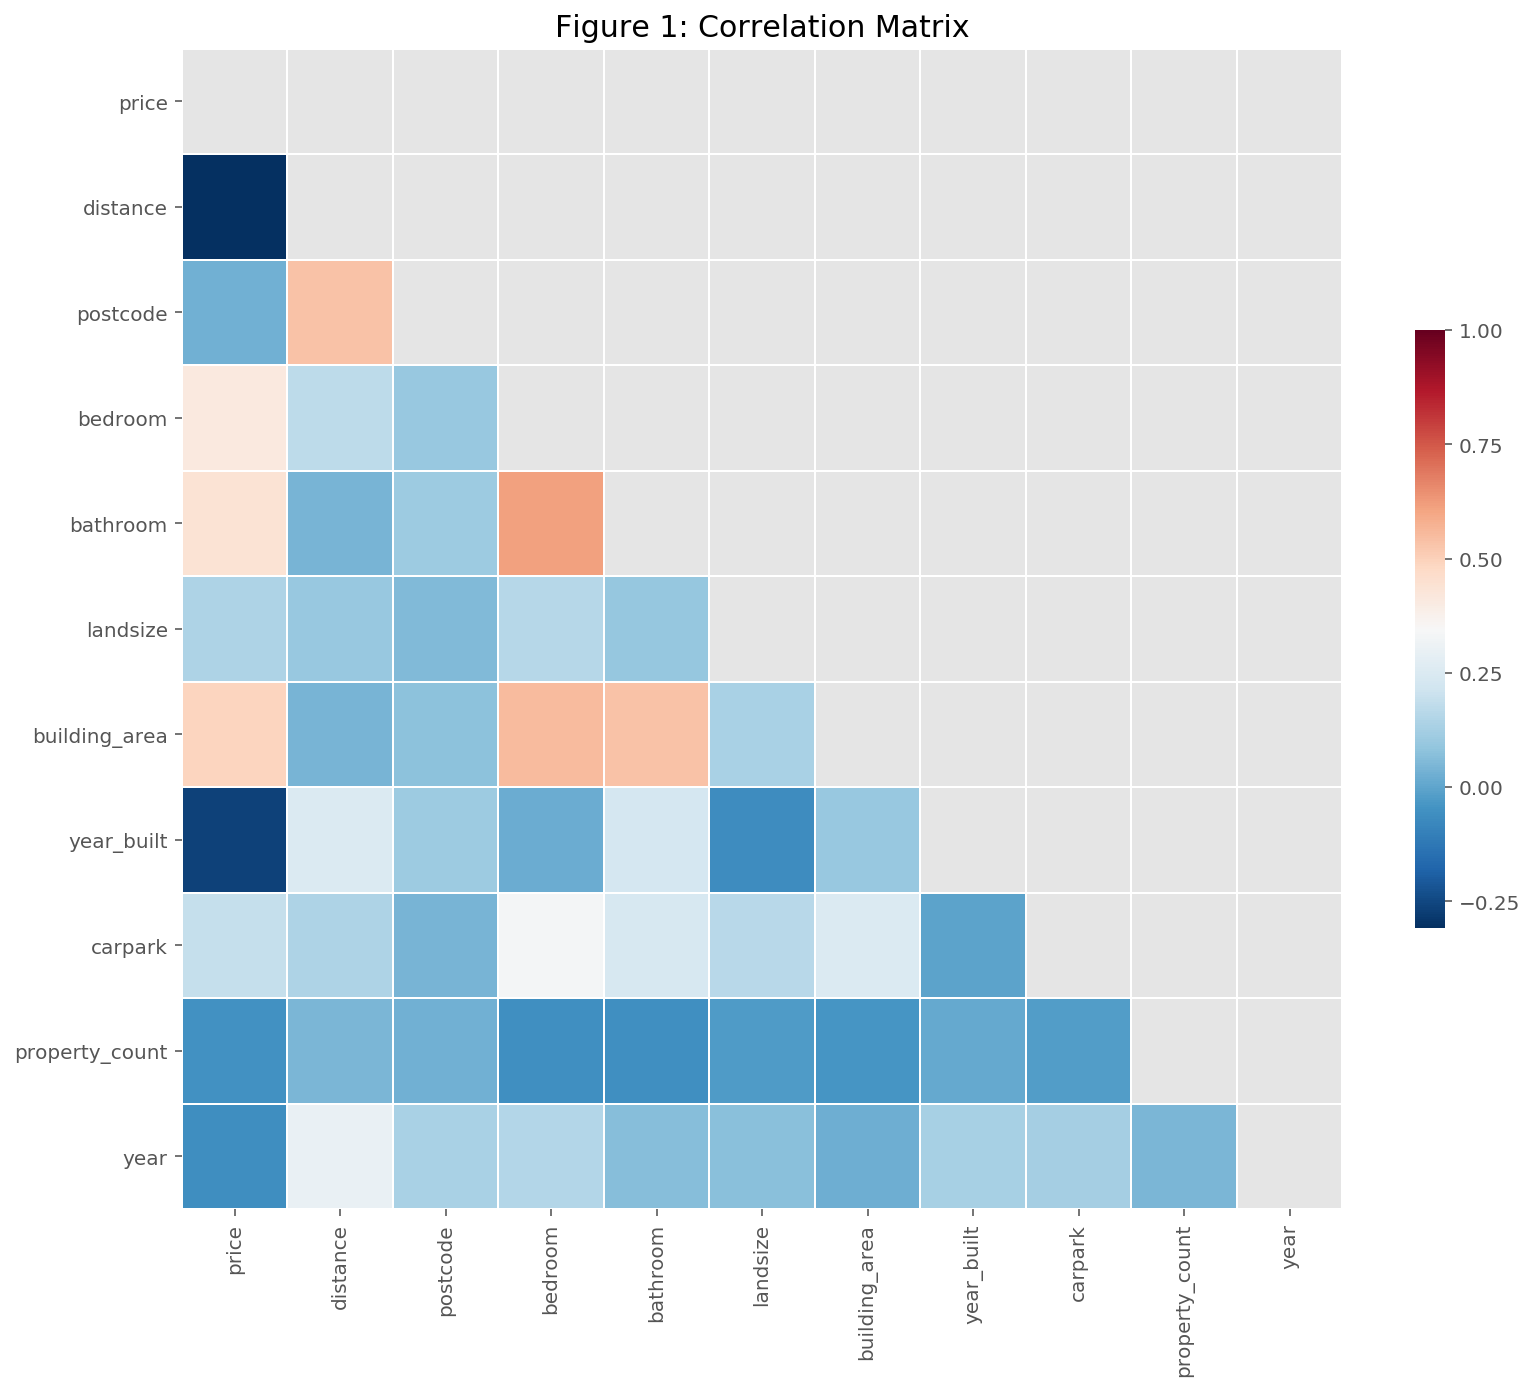

In [8]:
#Correlation plot
corr = houseDataSet.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13,11))
plt.title('Figure 1: Correlation Matrix', size=15)
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='RdBu_r', square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

#Describe dataset
display(houseDataSet.describe())

As seen in Figure 1 above, the strength of color refers to how strongly the datas features correlate, if the colour is blue the relationship is very weak, where as if it is dark red it has a strong positive relationship, and lastly if dark blue it affects it slightly in a negative way.

It's clear above that according to the data, theres plenty of strong relationships, more bathrooms/bedrooms, bigger house , this is logical and makes sense. But what is important here is the colour of the relationships against price. Which is our target.

Focusing here is important, because we can see whats integral to the cost of a house in Melbourne, the most important to house price seen here is building area, bedrooms and bathrooms being high. As well as keeping distance from the CBD and year_built low. year_built and distance are related with a correlation of around 0.25 (r value), meaing houses built near the city are usually older. I presume that being further to the city is what correlates the slight negative trend in price rather than age, but this cannot be asumed.

It's clear that these 5 features have the biggest affect on house prices, either positive or negative, than the rest.



__________

### Data visualization of one-variable attributes ###

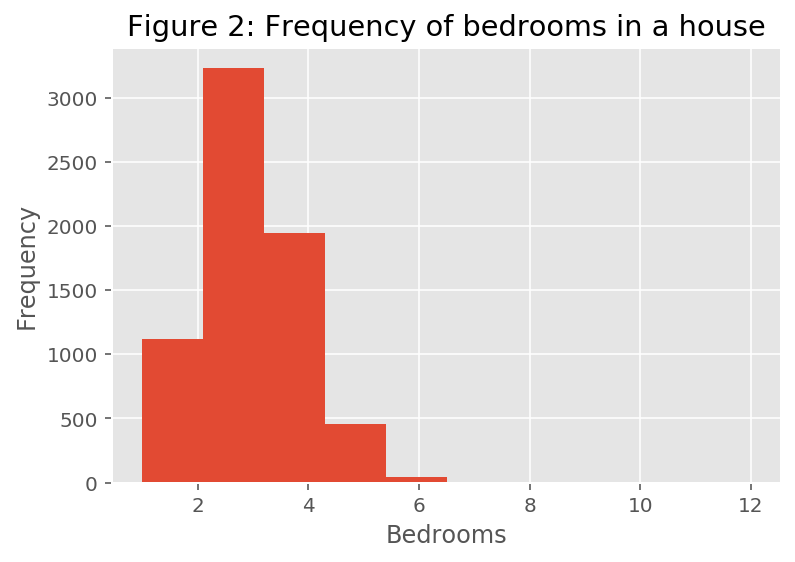

In [9]:
#Choosing 'bedroom' feature as the feature with ordinal values and using histogram to represent it visually
houseDataSet['bedroom'].plot(kind='hist')
plt.title('Figure 2: Frequency of bedrooms in a house')
plt.xlabel('Bedrooms')
plt.show()

As seen in Figure 2, the histogram entails a right skewed symmetric plot showing the popularity of bedrooms that is more frequent when searching for a house and the most frequent number of bedrooms in a house is 3 with a 35% more leverage against the other number of bedrooms in this particular dataset.
________

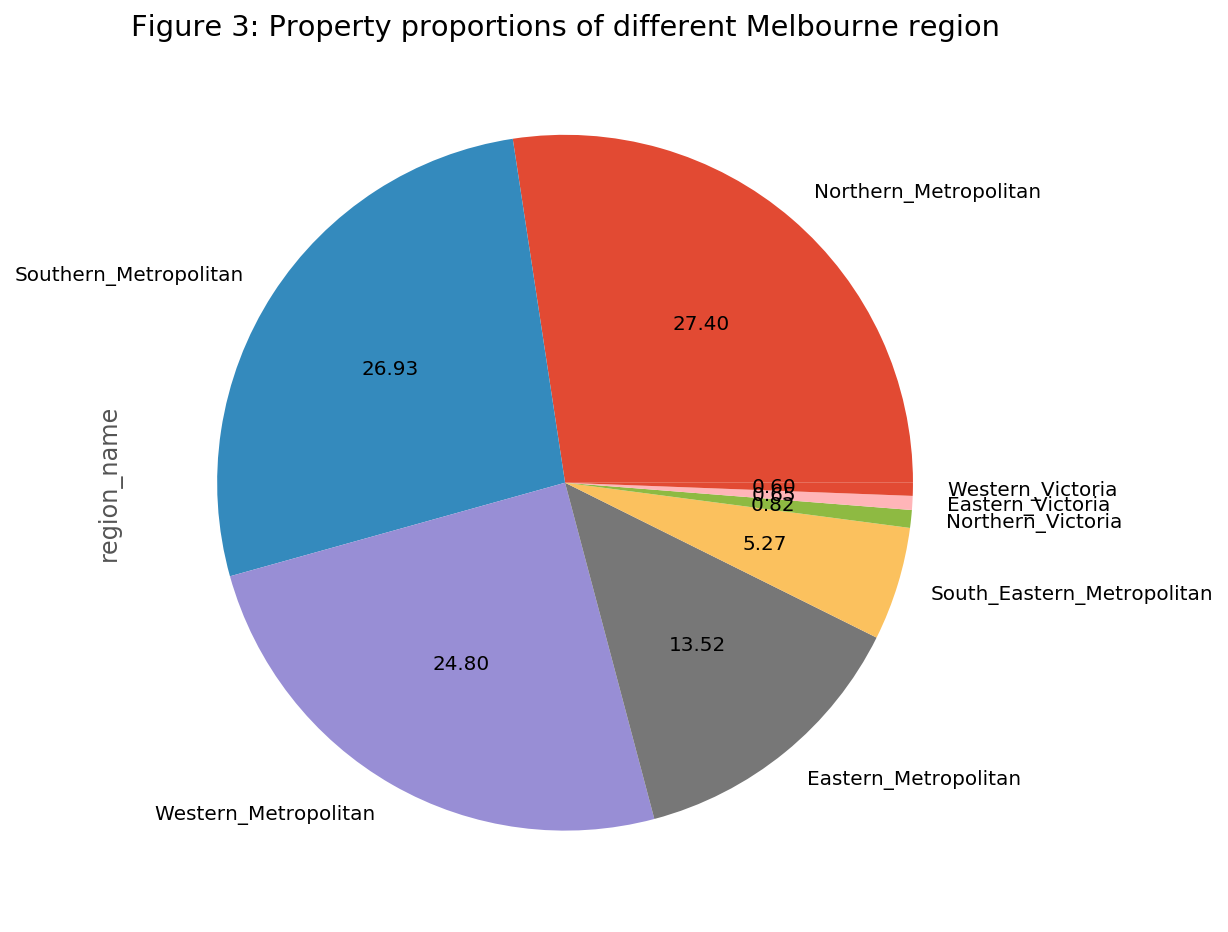

In [10]:
#Choosing 'region_name' feature as the feature with categorical values and using pie chart to represent it visually
houseDataSet['region_name'].value_counts().plot(kind='pie', autopct='%.2f')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Figure 3: Property proportions of different Melbourne region')
plt.show()

As shown in Figure 3 above, the pie chart states which Melbourne region has the most number of properties in this particular dataset. The regions are broken into two regions:

- Metropolitan Region (North, East, South & West)
- Victorian Region (North, East & West)

Northern Metropolition region is shown to have more prperties with a 27.40% rate, with Southern Metropolitan close second with a 26.93%, and third with the Western Metropolitan with a 24.80% rate. The least property counts are in the ones in regions within Victoria.

________

### Data visualization of two-variable attributes ###

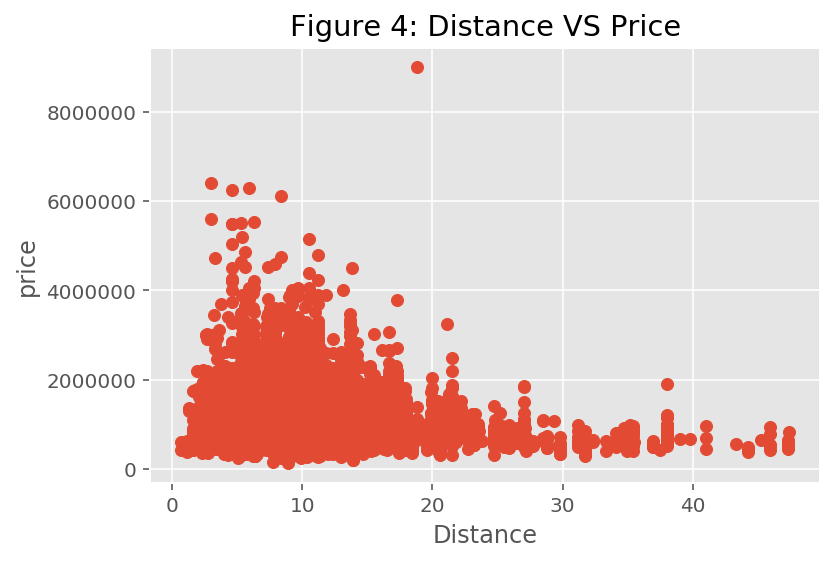

In [11]:
#Comparing the 'distance' and the 'price' feature and visualising it using scatterplot
plt.scatter(houseDataSet['distance'],houseDataSet['price'])
plt.title('Figure 4: Distance VS Price')
plt.xlabel('Distance')
plt.ylabel('price')
plt.show()

As seen in Figure 4 above, the right skewed symmetric scatter plot directly shows how the distance affects pricing. As we can see with the houses located further out, a significant decrease in pricing is noticed in comparison with the houses located nearby. Houses located at the end of the spectrum that are usually 4.5km away tend to be less than $1.3$ $million$ while being closer with a 0.3km distance will boost the price up to a range of $600,000$ all the way to $4.2$ $million$ with other houses outside this range but still in close tandem. As we can see there is one obvious outlier that is a clear discrepancy as it is valued at around $8.5$ $million$ despite not being the closest to the city (19km away from the city). This can be ignored.
_________

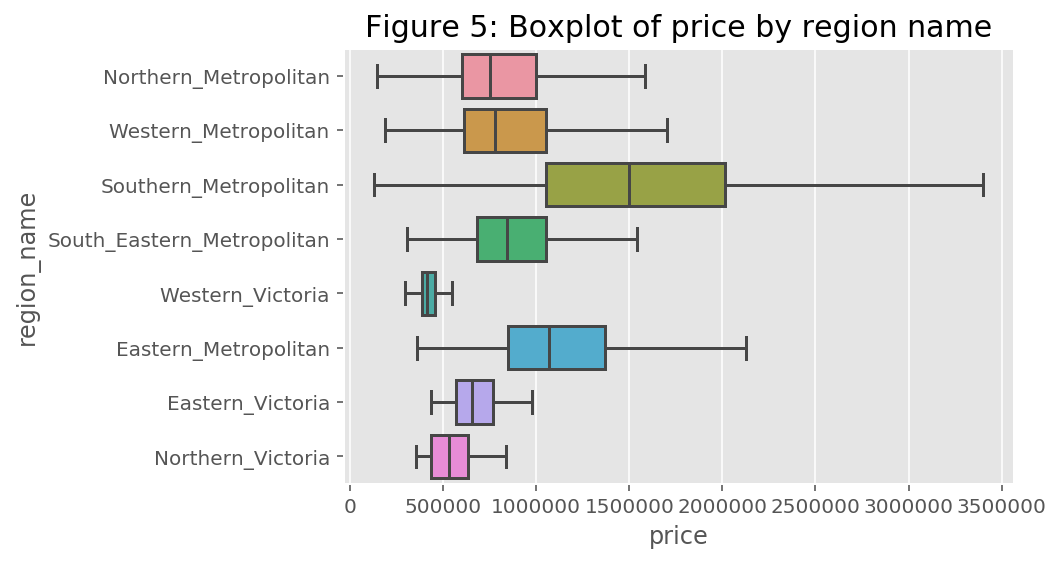

In [12]:
sns.boxplot(houseDataSet['price'], houseDataSet['region_name'],width=.8, showfliers=False);
plt.title('Figure 5: Boxplot of price by region name', fontsize = 15)
plt.show();


Figure 5 shows the varying price ranges for properties in comparison with different regional areas. We instantly identify that `Southern_Metropolitan` region possesses the widest price range average with minimum values varying from $250,000$ to maximum values of $3.3$ $million$. The price range for the average is also more spread out compared to other regions with the its average lying between $1.3$ $million$ to $2.3$ $million$. On the other hand we have `Western_Victoria` which displayed the lowest variation in pricing as well as some of the most affordable housing. It's minimum and maximum value of $350,000$ to $580,000$ lie very close to the average housing prices. With `Eastern_Victoria` we observe that the comparison in the previous figure (Figure 5) of property by region name does not affect pricing here. Despite `Eastern_Victoria` having the highest amount of properties, its displays relatively low property costs
_____

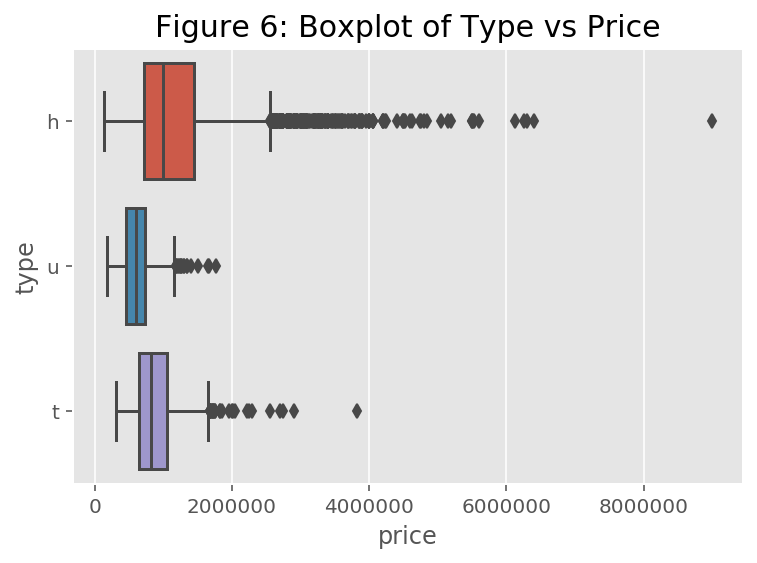

In [13]:
#Box plot of type against price
sns.boxplot(houseDataSet['price'], houseDataSet['type'],width=.8)
plt.title('Figure 6: Boxplot of Type vs Price', fontsize = 15)
plt.show()

As shown in Figure 6, the boxplot categorizes 3 different house types:

- House
- Townhouse
- Unit

As we can see, the `House` type is far more popular in comparison with the `Townhouse` and  the `Unit` . The boxplot makes it evident that the normal distribution for pricing houses lies between $200,000$ to $2.3$ $million$ with most houses averaging between $1.2$ $million$ to $1.6$ $million$. Houses in comparison with townhouses and units showed many more overpriced houses represented as outliers valuing between $2.4$ $million$ all the way out to $8.7$ $million$ with random variation.

With `Townhouse` the data was more concrete and had less variation. The minimum price for townhouses was valued at higher than houses at around 4 hundred thousand but had a lower maximum value at 1.6 million. The average range for townhouses was more compact, with the estimated value lying around $500,000-700,000$. This datatype also had outliers that were in closer proxmity to the average price (min-max) with those outliers lieing between the maximum average priced value $1.6$ $million$ all the way out to around $3.8$ $million$.

With `Unit` the data was very simple and straight-forward. It had a minimum value of $250,000$ which is directly comparable to the minimum value of houses but had a much lower maximum value of $1.3$ $million$. The average prices for units is very stable and has minimum variation lying between $800,000$ to $1$ $million$. We can also see that all the outliers are in close proxmity with the maximum value ranging between $1$ $million$ to $1.9$ $million$.


______


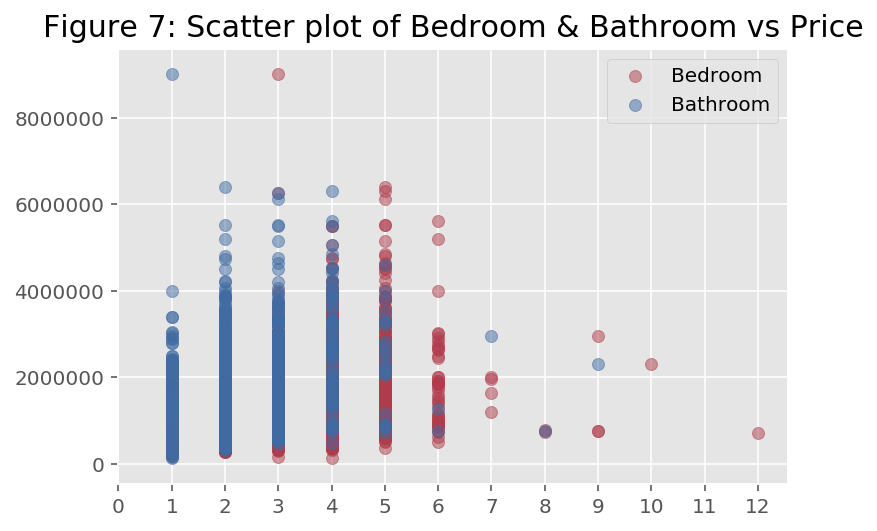

In [14]:
#Scatter plot of price with bedroom and bathroom
plt.scatter(houseDataSet['bedroom'], houseDataSet['price'], c='#b03c4b', alpha=0.5)
plt.scatter(houseDataSet['bathroom'], houseDataSet['price'], c='#416ba3', alpha=0.5)
plt.xticks(np.arange(13))
plt.legend(["Bedroom", "Bathroom"])
plt.title('Figure 7: Scatter plot of Bedroom & Bathroom vs Price', fontsize = 15)
plt.show()

In Figure 7, the scatter matrix compares the bedrooms & bathrooms together against the price of the house. The blue dot shows the bathroom while the red dot shows the bedrooms, on the x axis it shows a house with only 1 bathroom and no bedroom shows the estimate price to be between $0$ and $205,000$ with an outlier at $850,000$. Even though houses wth more bedrooms and bathrooms should be more expensive, we can see that this is not always the case.

_____

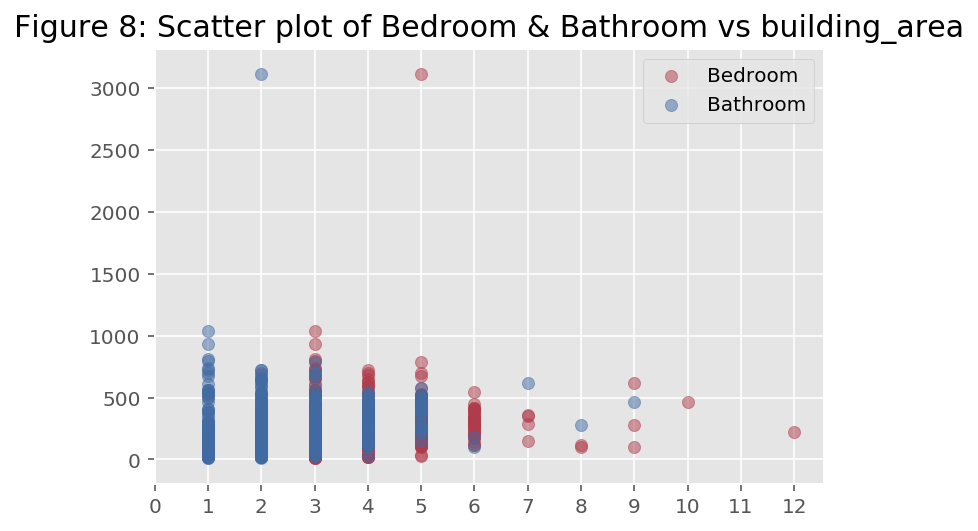

In [15]:
#Scatter plot of building_area with bedroom and bathroom
plt.scatter(houseDataSet['bedroom'], houseDataSet['building_area'], c='#b03c4b', alpha=0.5)
plt.scatter(houseDataSet['bathroom'], houseDataSet['building_area'], c='#416ba3', alpha=0.5)
plt.xticks(np.arange(13))
plt.legend(["Bedroom", "Bathroom"])
plt.title('Figure 8: Scatter plot of Bedroom & Bathroom vs building_area', fontsize = 15)
plt.show()

Even though the higher the bedroom and bathroom count the higher the building area should be the case, from the scatter plot we cannot ascertain such a relation as even 2-3 bedroom houses also seem to be very large

_______________

In [16]:
#Get dummies for all variables
houseDataAttrsExpand = pd.get_dummies(houseDataSet)
houseDataTarget = houseDataAttrsExpand[targetColumn]

houseDataAttrsExpand.head()

,price,distance,postcode,bedroom,bathroom,landsize,building_area,year_built,carpark,property_count,...,council_area_Yarra_City_Council,council_area_Yarra_Ranges_Shire_Council,region_name_Eastern_Metropolitan,region_name_Eastern_Victoria,region_name_Northern_Metropolitan,region_name_Northern_Victoria,region_name_South_Eastern_Metropolitan,region_name_Southern_Metropolitan,region_name_Western_Metropolitan,region_name_Western_Victoria
18804,1190000.0,3.0,3067.0,2.0,2.0,147.0,175.0,2000.0,1.0,4019.0,...,1,0,0,0,1,0,0,0,0,0
16638,1402500.0,3.0,3067.0,3.0,1.0,270.0,101.0,1960.0,1.0,4019.0,...,1,0,0,0,1,0,0,0,0,0
15393,480000.0,3.0,3067.0,2.0,1.0,601.0,64.0,1970.0,1.0,4019.0,...,1,0,0,0,1,0,0,0,0,0
15394,750000.0,3.0,3067.0,2.0,1.0,2379.0,69.0,2013.0,1.0,4019.0,...,1,0,0,0,1,0,0,0,0,0
16030,855000.0,3.0,3067.0,3.0,2.0,92.0,116.0,2004.0,1.0,4019.0,...,1,0,0,0,1,0,0,0,0,0


We are creating a dummie for all variables to change strings into columns and then finding the regression that fits the line best

In [17]:
# Get formula string for Regression
indendentVarString = ' + '.join(houseDataAttrsExpand.drop(columns=targetColumn).columns)
encodedFormulaString = 'price ~ ' + indendentVarString

In [18]:
#Fit regression model - Ordinary Least Squares
model = sm.formula.ols(formula=encodedFormulaString, data=houseDataAttrsExpand)
modelFitted = model.fit()
print(modelFitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     288.0
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:18:02   Log-Likelihood:                -96800.
No. Observations:                6795   AIC:                         1.937e+05
Df Residuals:                    6743   BIC:                         1.941e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
# Creating scatter plot
maxVals = int(np.max(houseDataAttrsExpand['price']))
actualPrice = houseDataAttrsExpand['price']
predictedPrice = modelFitted.fittedvalues

plt.title('Figure 9: Scatterplot of Price against predicted Price', fontsize=15)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.scatter(x=actualPrice, y=predictedPrice, c='#3266a8')
plt.plot(range(maxVals),range(maxVals), 'r', linestyle='dashed')
plt.show()

#Outliers of unit that should be 8,000,000+

#### Figure 9 was created using the OLS regression results presented above. This shows us that we can predict house prices well with an adjusted r-squared value of 0.683 for our model. Meaning that 68.3% of the variance can be explained by our model. We can't rely soley on r-squared to provide us with a good estimate of house prices, so we must also evaluate the residual plot The scatterplot is necessary in order to calculate the residual value (actual price - predicted price) . 

#### In the scatterplots out of the 6795 observations listed , we can clearly identify one major outlier that is placed within the 9.5 million actual price range where our prediction falls to far off the linear regression which depicts the actual prices. This outlier can be dismissed.
_______

In [ ]:
#Creating residual plot for easy visualisation
sns.residplot(x=actualPrice, y=predictedPrice, color='#3266a8')
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.title('Figure 10: Scatterplot of residuals', fontsize=15)
plt.show()

#### Majority of our predicted values are placed close to the regression line meaning our predictions for house values were near the actual price for houses although our model doesn't work too well at predicting higher priced houses as the prediction always fell below the residual.
_______________

In [ ]:
# Histogram of residuals to see distribution
residual = actualPrice - predictedPrice

plt.hist(residual,bins=30, color='#3266a8')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Figure 11: Histogram of residuals', fontsize=15)
plt.show()

#### This is also shown further in the histogram of residuals than the values seemed to be below much rather than above the residual, which can be explained by our model being off when the values are larger, again by actual value being lower than predicted.
______________

## Statistical Modeling and Performance Evaluation

In [ ]:
## patsy model from formula
patsyLinearReggression = patsy.ModelDesc.from_formula(encodedFormulaString)

# initialize variable-selected fit to full model
linearRegressionFitted = modelFitted

# Eliminate features with p value higher than 0.05
p_val_cutoff = 0.05
for i in range(len(linearRegressionFitted.model.exog_names)):
    pval_series = linearRegressionFitted.pvalues.copy()
    pval_series.sort_values(ascending=False, inplace=True)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    print(f"iteration: {i}, removing term: {term}, p-value: {pval:.3f}")
    terms = term.split(':')
    if (len(terms) == 1): # Main Term
        patsyLinearReggression.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term)]))    
    else: # Interaction term
        patsyLinearReggression.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(terms[0]), patsy.EvalFactor(terms[1])]))    
    linearRegressionFitted = smf.ols(formula=patsyLinearReggression, data=houseDataAttrsExpand).fit()

#Fit model with irrellevant features removed - Regularisation
reducedModelFitted = smf.ols(formula=patsyLinearReggression, data=houseDataAttrsExpand).fit()

print("="*111)
print(reducedModelFitted.summary())
print("="*111)
print("Feature Size:", len(reducedModelFitted.model.exog_names))
print("F-distribution p-value:", reducedModelFitted.f_pvalue)
print("R-squared:", reducedModelFitted.rsquared.round(3))
print("Adjusted R-squared:", reducedModelFitted.rsquared_adj.round(3))

In [ ]:
# Creating scatter plot
predictedPrice = reducedModelFitted.fittedvalues

plt.title('Figure 12: Scatterplot of Price against predicted Price', fontsize=15)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.scatter(x=actualPrice, y=predictedPrice, c='g', alpha=0.7)
plt.plot(range(maxVals),range(maxVals), 'r', linestyle='dashed')
plt.show()

#Outliers of unit that should be 8,000,000+

In [ ]:
#Creating residual plot for easy visualisation
sns.residplot(x=actualPrice, y=predictedPrice, color='g')
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.title('Figure 13: Scatterplot of residuals', fontsize=15)
plt.show()

In [ ]:
residual = actualPrice - predictedPrice

plt.hist(residual, bins=30, color='green')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Figure 14: Histogram of residuals', fontsize=15)
plt.show()

In Figure 12, 13 and 14 we ran a test and saw that one column or feature had a high p value. So in these table plots we dropped the value and then ran regression on it again. So figure 12 and 13 is shown after the higher p value feature is dropped. But we saw that it didn't affect the outcome as the R score is still the same. Hence the same scatter plots and histogram
___

## Summary and Conclusions

Focusing on our target feature price, we were able to obtain its most relevant features and create a regression model that represented 68.3% of the variance in house prices within Melbourne. We can see from the above data we have taken that the main influences on house prices are based on location, ie, distance from the CBD, house type, and building area, which usually coincides with the amount of bedrooms and bathrooms. 

The amount of bedrooms and bathrooms, although important in determining the price of a house, is independant of according to our data (specifically figure 1) with location, which seems to be the most important aspect when determining the price of a house.

All our other diagnostic checks on the data seem to confirm this, the specific features we observed via different data visualisations were relevant in determining house pricing. And that our regression model was rather accurate. Again with only one major factor being location as seen in figure 6. 

adjusting our liner regression model didn't affect the model greatly and gave us quite a similar result as our previous model (Adjusted r. 68.3%). So it seems we can determine house prices fairly well, ways to improve the model may be to include more features that would help the model determine price. There may be more to determing house price such as amount of levels, facilities (Pool, Spa, Sauna, Recreation room), that we can't explore in our current data set. Showing us the limits in scope that our dataset gives us. 

One way to improve predicting price may be to seperate the dataset into its own seperate regression models according to location, for example, each region having their own linear regression model excluding the rest of Melbourne and its outer lying regions, to give a better representation of price for its own location. But that is outside of the scope that we were observing, if you want to predict a house in a specific area, we recommend doing this, other wise in general, using our model will be perfectly fine.

Our regression model will predict house prices correctly until the $ 3  million$ dollar mark, until it starts to underestimate price as seen by the regression model in figures in 10 and 13, and seeing as our mean house price is $ 1.1  million$ and the standard deviation is $ 663306.5$ dollars, both found during data exploration, it the model will be accurate unless you are 1.5+ standard deviations positive of the mean. Which aquates for majority of the data. 




